# Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore


In [2]:
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Visualization

<AxesSubplot:>

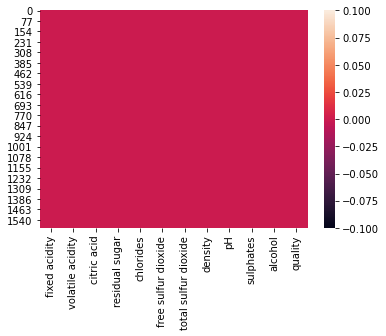

In [9]:
sns.heatmap(df.isnull())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

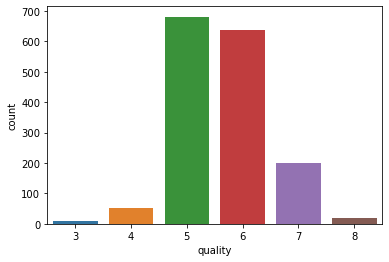

In [10]:
sns.countplot(df['quality'])
df['quality'].value_counts()

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

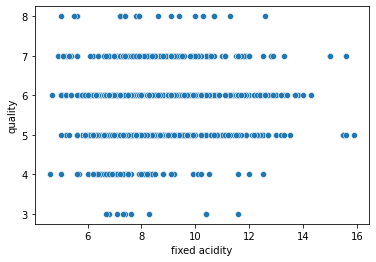

In [11]:
sns.scatterplot(data = df, x= "fixed acidity",y ="quality")

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

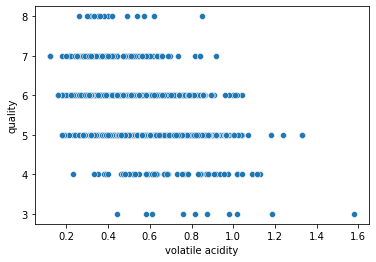

In [12]:
sns.scatterplot(data = df, x= "volatile acidity",y ="quality")

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

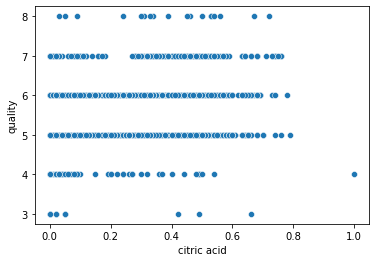

In [13]:
sns.scatterplot(data = df, x= "citric acid",y ="quality")

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

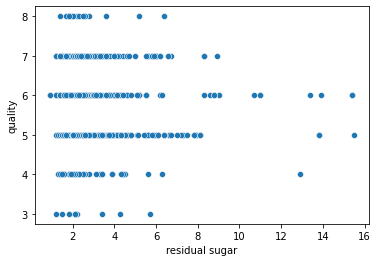

In [14]:
sns.scatterplot(data = df, x= "residual sugar",y ="quality")

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

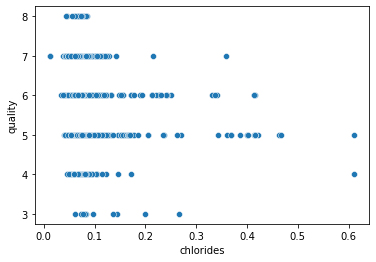

In [15]:
sns.scatterplot(data = df, x= "chlorides",y ="quality")

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

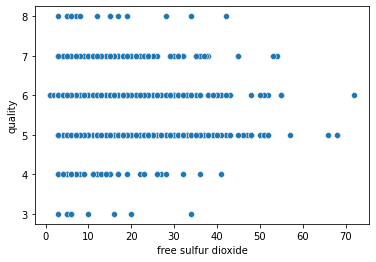

In [16]:
sns.scatterplot(data = df, x= "free sulfur dioxide",y ="quality")

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

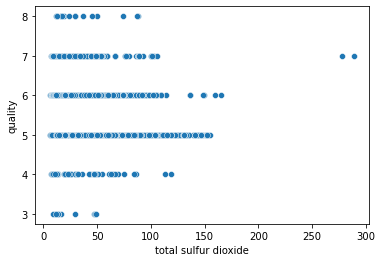

In [17]:
sns.scatterplot(data = df, x= "total sulfur dioxide",y ="quality")

<AxesSubplot:xlabel='density', ylabel='quality'>

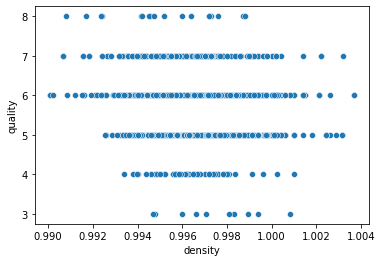

In [18]:
sns.scatterplot(data = df, x= "density",y ="quality")

<AxesSubplot:xlabel='pH', ylabel='quality'>

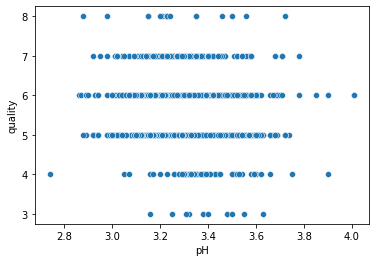

In [19]:
sns.scatterplot(data = df, x= "pH",y ="quality")

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

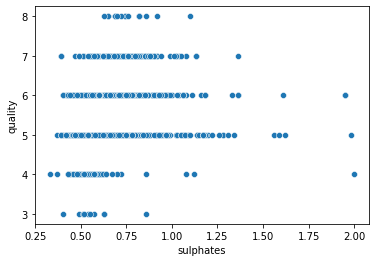

In [20]:
sns.scatterplot(data = df, x= "sulphates",y ="quality")

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

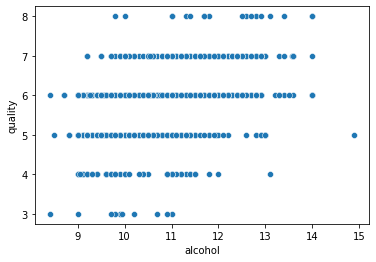

In [21]:
sns.scatterplot(data = df, x= "alcohol",y ="quality")

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

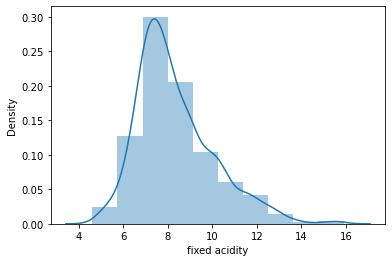

In [22]:
sns.distplot(df['fixed acidity'],bins = 10)

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

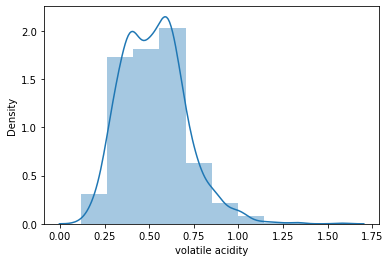

In [23]:
sns.distplot(df['volatile acidity'],bins = 10)

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

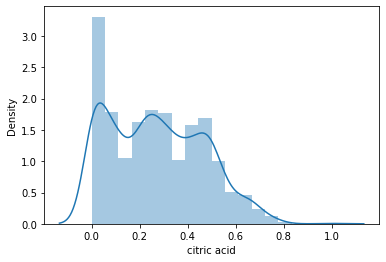

In [24]:
sns.distplot(df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

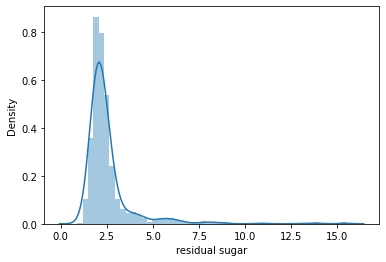

In [25]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

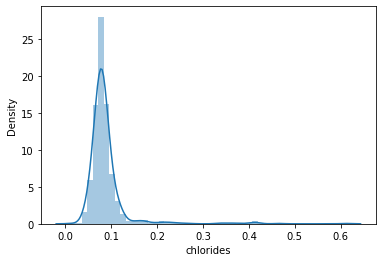

In [26]:
sns.distplot(df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

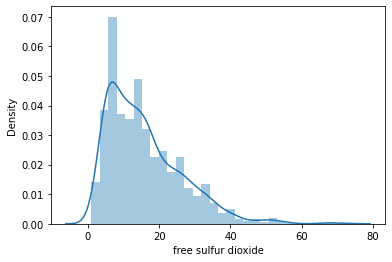

In [27]:
sns.distplot(df["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

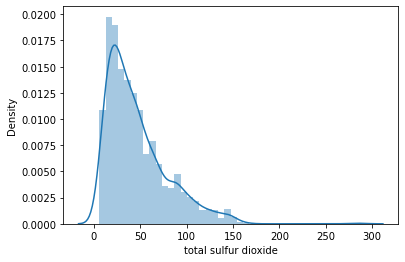

In [28]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

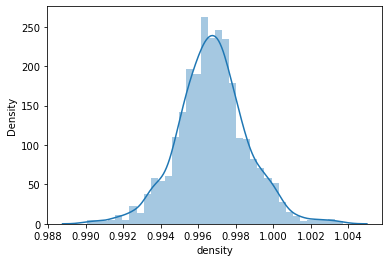

In [29]:
sns.distplot(df["density"])

<AxesSubplot:xlabel='pH', ylabel='Density'>

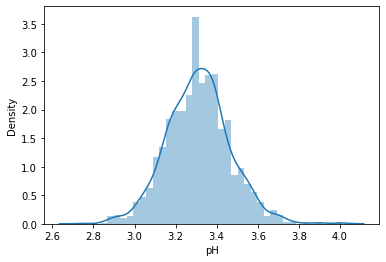

In [30]:
sns.distplot(df["pH"])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

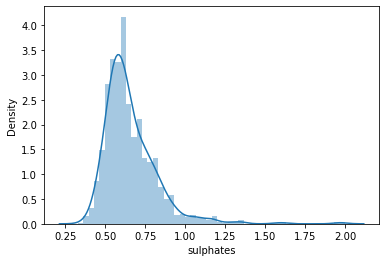

In [31]:
sns.distplot(df["sulphates"])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

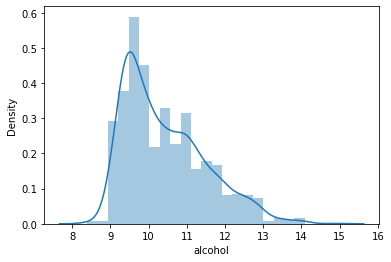

In [32]:
sns.distplot(df["alcohol"])

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

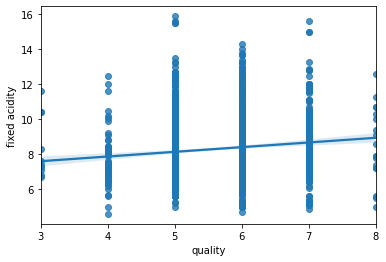

In [33]:
sns.regplot (data=df,x = "quality",y = "fixed acidity")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

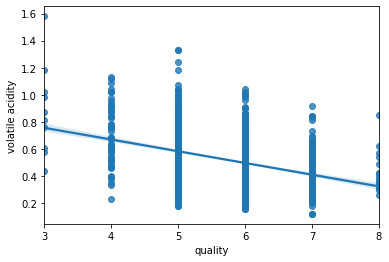

In [34]:
sns.regplot(data=df,x ="quality",y = "volatile acidity")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

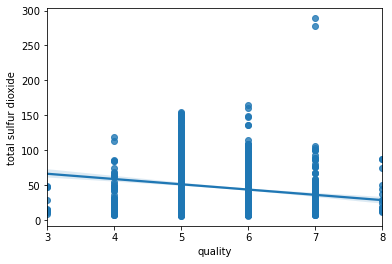

In [35]:
sns.regplot(data = df,x = "quality",y = "total sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='pH'>

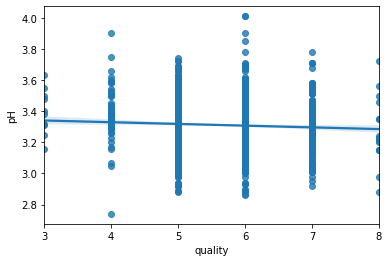

In [36]:
sns.regplot(data = df,x ="quality",y= "pH")

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

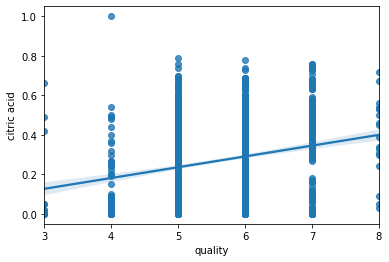

In [37]:
sns.regplot(data =df,x = "quality",y = "citric acid")

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

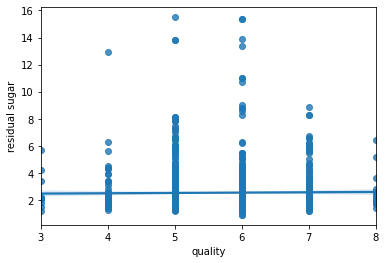

In [38]:
sns.regplot(data = df,x = "quality",y = "residual sugar")

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

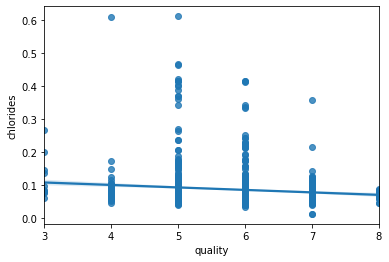

In [39]:
sns.regplot(data=df,x = "quality",y = "chlorides")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

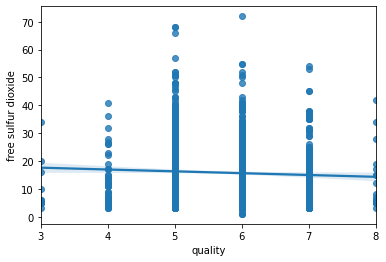

In [40]:
sns.regplot(data= df,x = "quality",y = "free sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='density'>

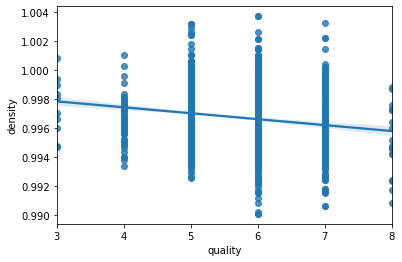

In [41]:
sns.regplot(data = df,x = "quality",y ="density")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

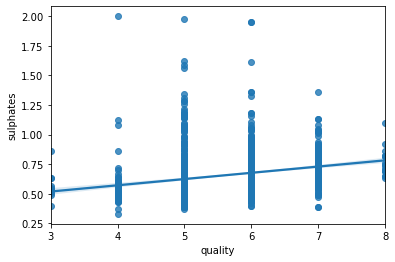

In [42]:
sns.regplot(data = df,x = "quality",y = "sulphates")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

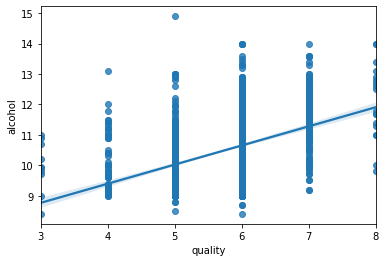

In [43]:
sns.regplot(data = df,x="quality",y = "alcohol")

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

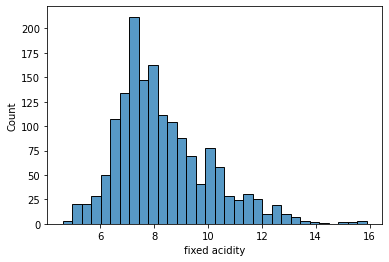

In [44]:
sns.histplot(df["fixed acidity"])

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

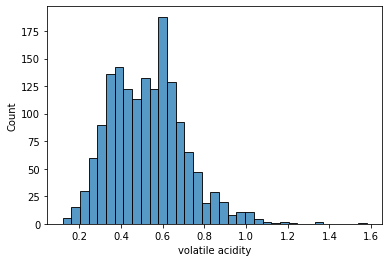

In [45]:
sns.histplot(df["volatile acidity"])

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

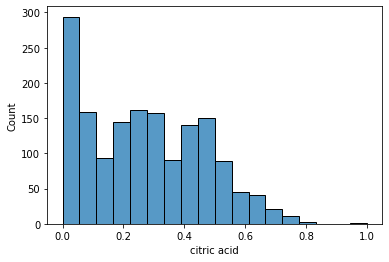

In [46]:
sns.histplot(df["citric acid"])

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

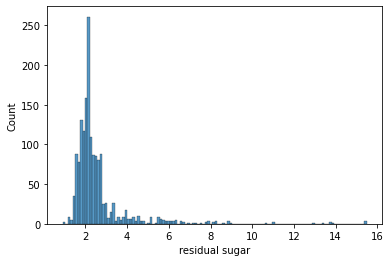

In [47]:
sns.histplot(df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

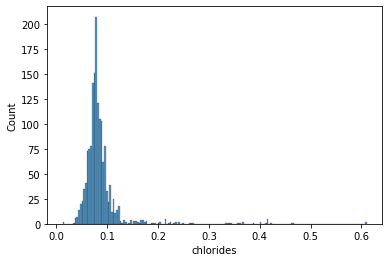

In [48]:
sns.histplot(df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

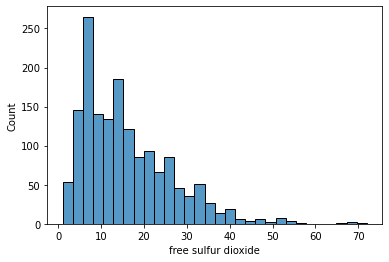

In [49]:
sns.histplot(df["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

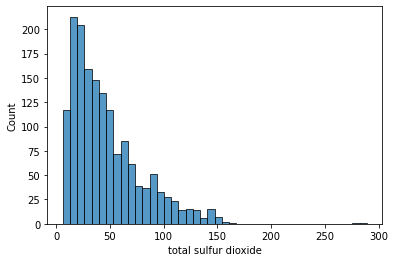

In [50]:
sns.histplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='density', ylabel='Count'>

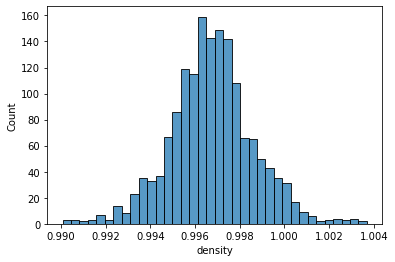

In [51]:
sns.histplot(df["density"])

<AxesSubplot:xlabel='pH', ylabel='Count'>

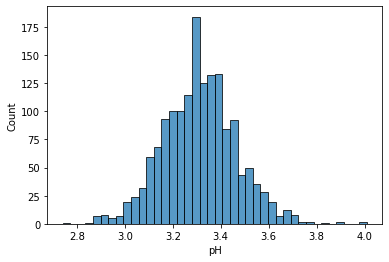

In [52]:
sns.histplot(df["pH"])

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

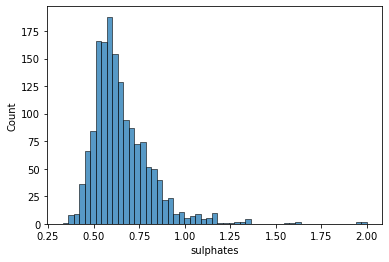

In [53]:
sns.histplot(df["sulphates"])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

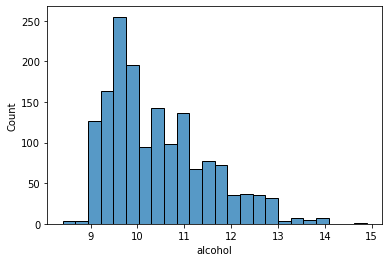

In [54]:
sns.histplot(df["alcohol"])

# To Check Correlation

In [55]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


array([<AxesSubplot:title={'center':'fixed acidity'}>,
       <AxesSubplot:title={'center':'volatile acidity'}>,
       <AxesSubplot:title={'center':'citric acid'}>,
       <AxesSubplot:title={'center':'residual sugar'}>,
       <AxesSubplot:title={'center':'chlorides'}>,
       <AxesSubplot:title={'center':'free sulfur dioxide'}>,
       <AxesSubplot:title={'center':'total sulfur dioxide'}>,
       <AxesSubplot:title={'center':'density'}>,
       <AxesSubplot:title={'center':'pH'}>,
       <AxesSubplot:title={'center':'sulphates'}>,
       <AxesSubplot:title={'center':'alcohol'}>,
       <AxesSubplot:title={'center':'quality'}>], dtype=object)

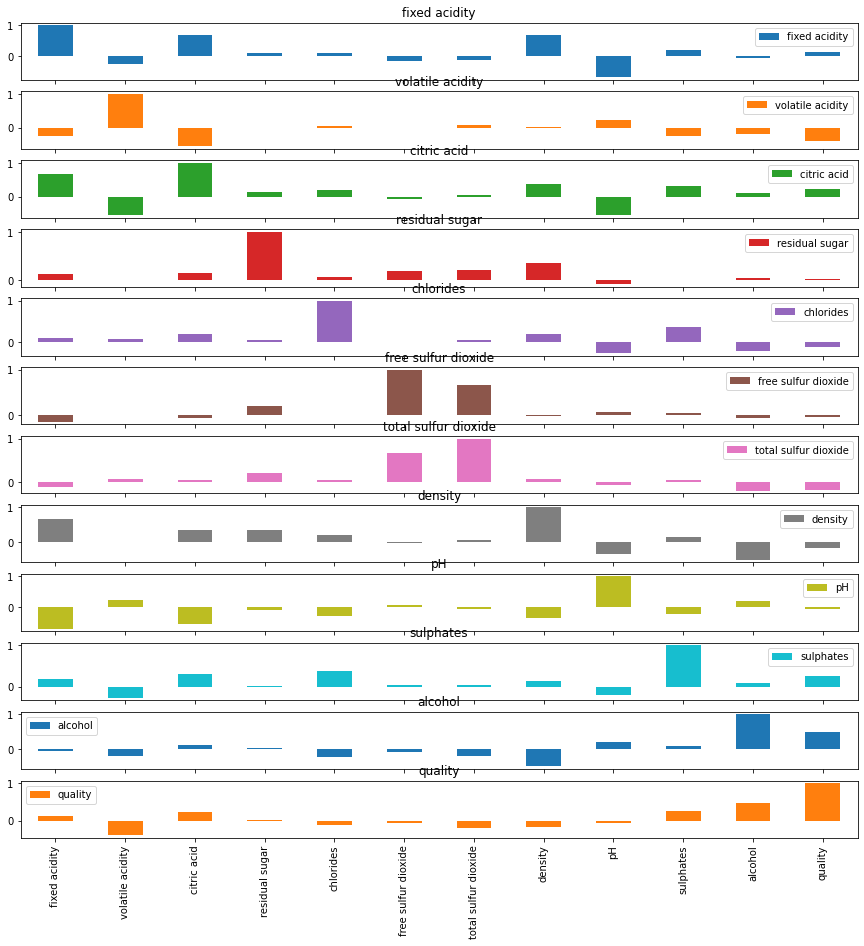

In [56]:
corr.plot(kind='bar',subplots = True,figsize = (15,15))

<AxesSubplot:>

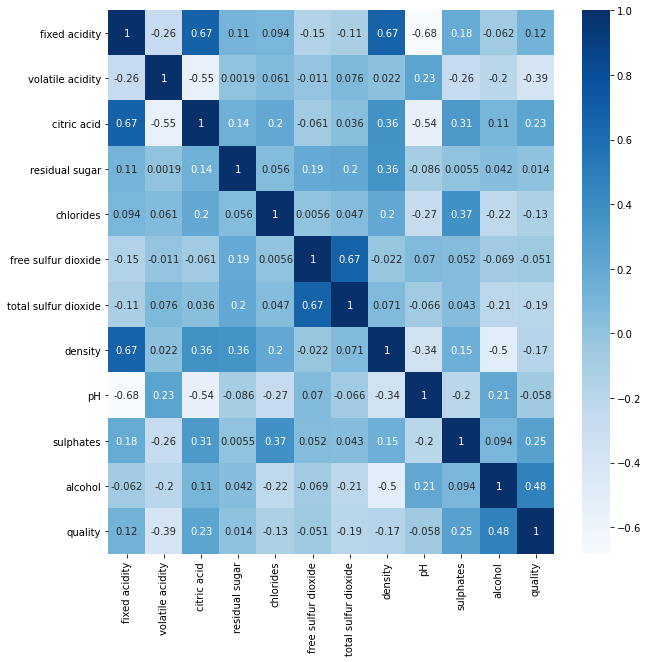

In [57]:
plt.figure(figsize =(10,10))
sns.heatmap(corr,cmap = "Blues",annot = True)

# Outcome of the correlation
The correlation with the taraget columns some inputs have positive correlation and some have negative correlation
fixed acidity has 12 percent correlation with target column which is quality which is considered has good bond.volatile acidity has -39 percent correlation with target column which is quality which is considered has weak bond.citric acid 23 percent correlation with target column which is quality which is considered has good bond.residual sugar has 14 percent correaltion with target column which is quality which is considered has good bond.cholrides has -13 percent correlation with target column which quality column which is considered has weak bond.free sulfur dioxide has -51 percent correlation with the target column which is quality which considered has weak bond.total sulfur dioxide has -19 percent correlation with the target column which is quality which is considered has weak bond.density has -17 percent correlation with the target column which is quality which is 
considered has weak bond.pH has -58 percent correlation with the target column which is quality which is considered has weak bond sulphates has 25 percent correlation with the target column which is quality which is considered has good bond.alcohol has 48 percent correaltion with the target column which is quality is considered has strong bond
Maximum correlation = alcohol, Minimum correlation = free sulfur dioxide

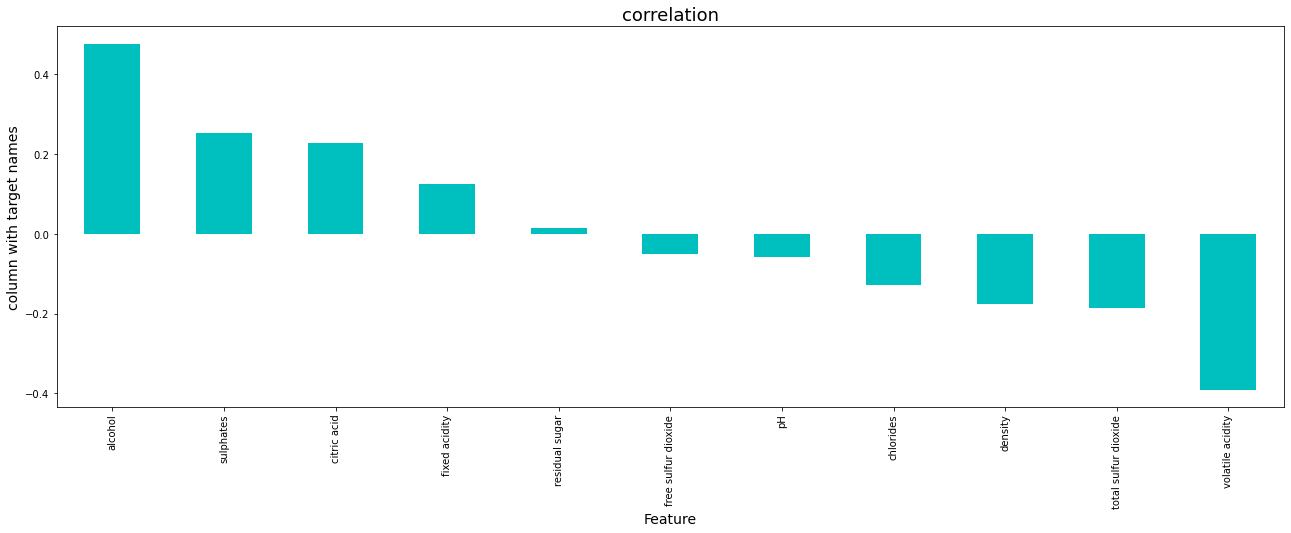

In [58]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending =False).drop(['quality']).plot(kind ='bar',color ='c')
plt.xlabel('Feature',fontsize = 14)
plt.ylabel('column with target names',fontsize = 14)
plt.title("correlation",fontsize = 18)
plt.show()

# Plotting outliers

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

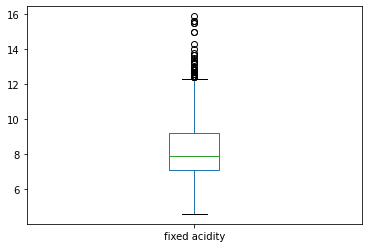

In [60]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

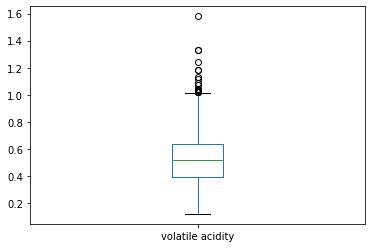

In [61]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

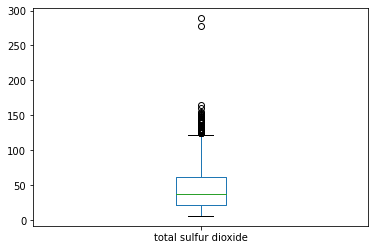

In [62]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

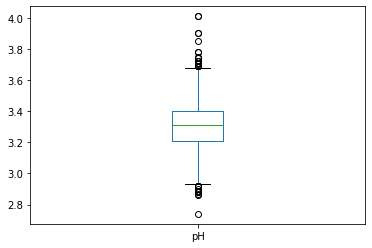

In [63]:
df['pH'].plot.box()

fixed acidity              AxesSubplot(0.125,0.536818;0.0824468x0.343182)
volatile acidity        AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
citric acid             AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
residual sugar          AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
chlorides               AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
free sulfur dioxide     AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
total sulfur dioxide    AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
density                 AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
pH                            AxesSubplot(0.125,0.125;0.0824468x0.343182)
sulphates                  AxesSubplot(0.223936,0.125;0.0824468x0.343182)
alcohol                    AxesSubplot(0.322872,0.125;0.0824468x0.343182)
quality                    AxesSubplot(0.421809,0.125;0.0824468x0.343182)
dtype: object

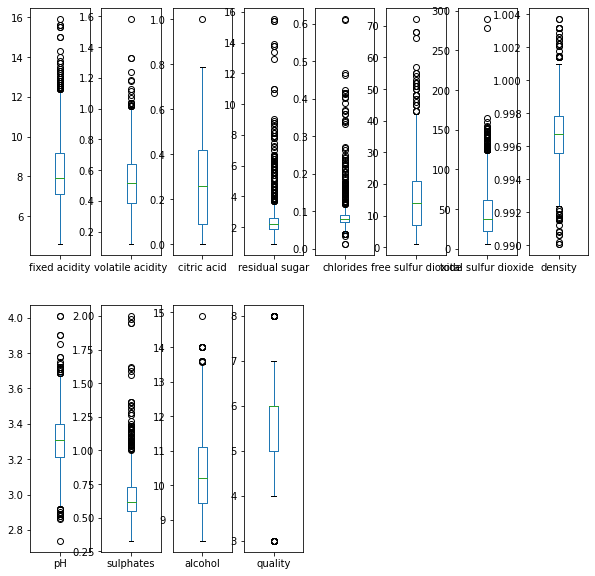

In [64]:
df.plot(kind = 'box', subplots = True,layout = (2,8),figsize = (10,10))

As per above boxplots we can see that every input has many outliers.

In [65]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

There is skewness in the columns of residual sugar,chlorides and sulphates  

# Removing outliers:

In [66]:
z = np.abs(zscore(df))
z.shape

(1599, 12)

In [67]:
threshold = 3
print(np.where (z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [68]:
df_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1451, 12)


# Percentage of data loss

In [69]:
loss_percent = (1599-1451)/1599*100
print(loss_percent)

9.255784865540964


# Transforming data to remove skewness

In [125]:
df_new['good quality'] = [1 if x >= 7 else 0 for x in df_new['quality']]
X= df_new.drop(['quality','good quality'], axis = 1)
y= df_new['good quality']

In [126]:
print(df_new['good quality'].value_counts())

0    1250
1     201
Name: good quality, dtype: int64


In [127]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [128]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [129]:
scale  = MinMaxScaler()
x = scale.fit_transform(x)

In [130]:
x

array([[0.28235294, 0.63043478, 0.        , ..., 0.27710843, 0.17647059,
        0.25      ],
       [0.32941176, 0.82608696, 0.        , ..., 0.42168675, 0.25490196,
        0.25      ],
       [0.32941176, 0.69565217, 0.05063291, ..., 0.38554217, 0.25490196,
        0.25      ],
       ...,
       [0.15294118, 0.42391304, 0.16455696, ..., 0.5060241 , 0.49019608,
        0.5       ],
       [0.10588235, 0.57065217, 0.15189873, ..., 0.45783133, 0.33333333,
        0.25      ],
       [0.11764706, 0.20652174, 0.59493671, ..., 0.39759036, 0.49019608,
        0.5       ]])

In [131]:
from imblearn.over_sampling  import SMOTE
xtrain_over,xtest_over = SMOTE(k_neighbors = 3).fit_resample(x,y)

In [133]:
xtrain_over

array([[0.28235294, 0.63043478, 0.        , ..., 0.27710843, 0.17647059,
        0.25      ],
       [0.32941176, 0.82608696, 0.        , ..., 0.42168675, 0.25490196,
        0.25      ],
       [0.32941176, 0.69565217, 0.05063291, ..., 0.38554217, 0.25490196,
        0.25      ],
       ...,
       [0.38285795, 0.16506099, 0.50289287, ..., 0.44905377, 0.82716884,
        0.75      ],
       [0.60832276, 0.2826087 , 0.62097157, ..., 0.38554217, 0.61709065,
        0.75      ],
       [0.71396306, 0.32472548, 0.59612585, ..., 0.52559316, 0.70281236,
        0.75      ]])

In [134]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: good quality, Length: 1451, dtype: int64

In [135]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size = .2,random_state =0)

In [136]:
xtrain.shape

(1160, 12)

In [137]:
ytrain.shape

(1160,)

In [138]:
xtest.shape

(291, 12)

In [139]:
ytest.shape

(291,)

In [140]:
from sklearn.metrics import classification_report,auc,roc_curve

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [158]:
lm.fit(xtrain,ytrain)

LogisticRegression()

In [159]:
lm.score(xtrain,ytrain)

0.9922413793103448

In [179]:
pred=lm.predict(xtest)
print("predicted result score:",pred)
print("actual score:",ytest)

predicted result score: [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual score: 968     0
541     0
1426    0
310     0
318     1
       ..
1380    0
712     0
286     0
1060    0
535     0
Name: good quality, Length: 291, dtype: int64


In [180]:
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)
pred_test= mnb.predict(xtest)
print(accuracy_score(ytest,pred_test))
print(confusion_matrix(ytest,pred_test))
print(classification_report(ytest,pred_test))

0.8591065292096219
[[250   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       250
           1       0.00      0.00      0.00        41

    accuracy                           0.86       291
   macro avg       0.43      0.50      0.46       291
weighted avg       0.74      0.86      0.79       291



In [143]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [144]:
dt.score(xtrain,ytrain)
preddt = dt.predict(xtest)
print(accuracy_score(ytest,preddt))
print(confusion_matrix(ytest,preddt))
print(classification_report(ytest,preddt))

1.0
[[250   0]
 [  0  41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00        41

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [145]:
knn= KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
predknn = knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.9862542955326461
[[249   1]
 [  3  38]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       0.97      0.93      0.95        41

    accuracy                           0.99       291
   macro avg       0.98      0.96      0.97       291
weighted avg       0.99      0.99      0.99       291



In [146]:
svc = SVC(kernel = 'rbf')
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)
predsvc = svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.9965635738831615
[[250   0]
 [  1  40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      0.98      0.99        41

    accuracy                           1.00       291
   macro avg       1.00      0.99      0.99       291
weighted avg       1.00      1.00      1.00       291



In [147]:
svc = SVC(kernel = 'poly')
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)
predsvc = svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

1.0
[[250   0]
 [  0  41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00        41

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [148]:
def svmkernel (ker):
    svc = SVC(kernel=ker)
    svc.fit(xtrain,ytrain)
    svc.score(xtrain,ytrain)
    predsvc = svc.predict(xtest)
    print(accuracy_score(ytest,predsvc))
    print(confusion_matrix(ytest,predsvc))
    print(classification_report(ytest,predsvc))

In [149]:
svmkernel('rbf')

0.9965635738831615
[[250   0]
 [  1  40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      0.98      0.99        41

    accuracy                           1.00       291
   macro avg       1.00      0.99      0.99       291
weighted avg       1.00      1.00      1.00       291



In [150]:
svmkernel('poly')

1.0
[[250   0]
 [  0  41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00        41

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [151]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(mnb,x,y,cv = 9)
print(score)
print(score.mean())
print(score.std())

[0.85802469 0.85802469 0.86335404 0.86335404 0.86335404 0.86335404
 0.86335404 0.86335404 0.85714286]
0.8614796070512657
0.002661687360943333


In [152]:
from sklearn.model_selection import KFold

score = cross_val_score(knn,x,y,cv = 11)
print(score)
print(score.mean())
print(score.std())


[0.96212121 0.95454545 0.96969697 0.96969697 0.99242424 0.98484848
 0.96969697 0.96212121 0.96969697 0.97727273 0.96183206]
0.9703593884718102
0.010465840797992133


In [153]:
score = cross_val_score(dt,x,y,cv = 5)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1.]
1.0
0.0


In [154]:
score = cross_val_score(svc,x,y,cv = 6)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1. 1.]
1.0
0.0


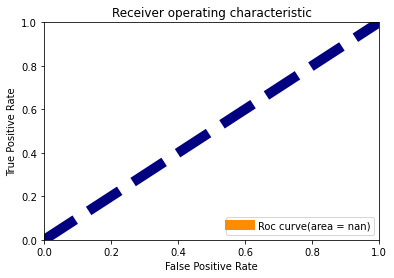

In [155]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,ytest)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw = 10,label = 'Roc curve(area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],  color = 'navy',lw = 10,linestyle = "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc ="lower right" )
plt.show()

In [160]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(xtrain,ytrain)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 1.0


In [161]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [162]:
preddt= dt.predict(xtest)

In [163]:
print('Accuracy::',accuracy_score(ytest,preddt))
confusion_matrix(ytest,preddt)

Accuracy:: 1.0


array([[250,   0],
       [  0,  41]], dtype=int64)

In [164]:
print(classification_report(ytest,preddt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00        41

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [165]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"max_depth":range(1,10),"min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}


In [167]:
from sklearn.base import clone
grid_search_cv = GridSearchCV(dt,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(xtrain,ytrain)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [168]:
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=1)
1.0


In [173]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(xtrain, ytrain)
y_pred2 = model2.predict(xtest)
print('Accuracy::',accuracy_score(ytest,y_pred2))
print(classification_report(ytest, y_pred2))

Accuracy:: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00        41

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [176]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(xtrain, ytrain)
y_pred2 = model2.predict(xtest)
print(classification_report(ytest, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00        41

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [183]:
LR=print("Accuracy_score of Logistic:",accuracy_score(ytest,pred))
DT=print('Accuracy_score of Decision Tree::',accuracy_score(ytest,preddt))
RF=print('Accuracy_score of Random Forest::',accuracy_score(ytest,y_pred2))

Accuracy_score of Logistic: 0.9965635738831615
Accuracy_score of Decision Tree:: 1.0
Accuracy_score of Random Forest:: 1.0


In [184]:
import pickle
filename="Wine_Quality.pk1"
pickle.dump(lm,open(filename,'wb'))

In [187]:
import numpy as np
a=np.array(ytest)
predicted=np.array(lm.predict(xtest))
df_wine=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [188]:
df_wine

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
286,0,0
287,0,0
288,0,0
289,0,0
